### ABSTRACT:
#### This study explores the prediction of insurance premiums utilizing linear regression, leveraging factors such as age, sex, BMI, number of children, smoking status, region, and existing charges. Drawing upon a dataset encompassing historical data on these variables, we employ feature selection and preprocessing techniques to identify key predictors influencing insurance premiums. Through the application of linear regression, we construct a predictive model aimed at estimating insurance premiums based on these factors. Evaluation metrics such as mean squared error and R-squared are employed to assess the model's accuracy and reliability. 
#### Furthermore, the interpretability of the model is examined to elucidate the relationships between the predictors and insurance premiums. The findings of this research contribute valuable insights for insurers in pricing policies and managing risk effectively, thereby enhancing decision-making processes within the insurance industry.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data=pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.shape

(1338, 7)

In [4]:
data.size

9366

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [8]:
data.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [9]:
data.duplicated().sum()

1

In [10]:
data.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [11]:
sex_=data['sex'].value_counts()
print(sex_)

male      676
female    662
Name: sex, dtype: int64


In [12]:
print(type(sex_))

<class 'pandas.core.series.Series'>


In [13]:
smokers=data['smoker'].value_counts()
print(smokers)

no     1064
yes     274
Name: smoker, dtype: int64


In [14]:
print(type(smokers))

<class 'pandas.core.series.Series'>


In [15]:
regions=data['region'].value_counts()
print(regions)

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [16]:
print(type(regions))

<class 'pandas.core.series.Series'>


C:\Users\DELL\AppData\Local\Temp\ipykernel_26196\1179533134.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


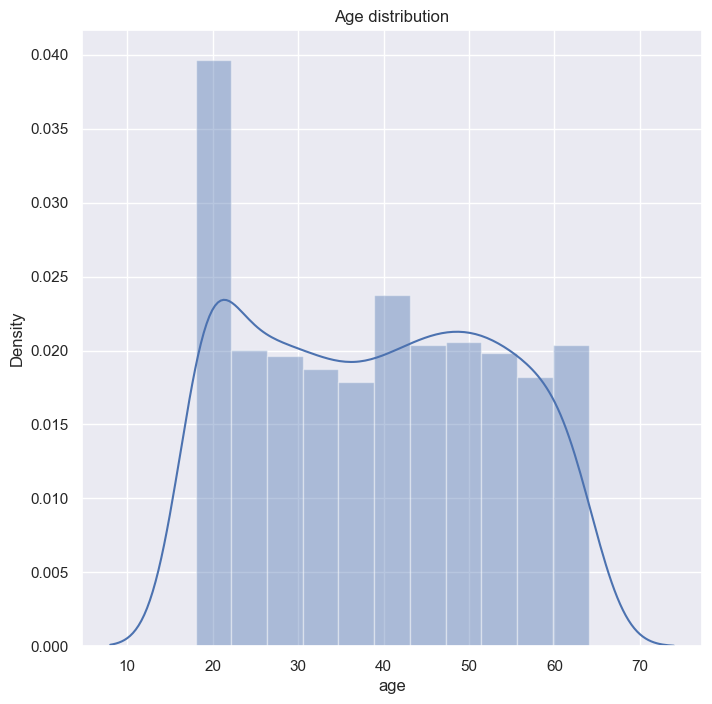

In [17]:
sns.set()
plt.figure(figsize=(8,8))
sns.distplot(data['age'])
plt.title('Age distribution')
plt.show()

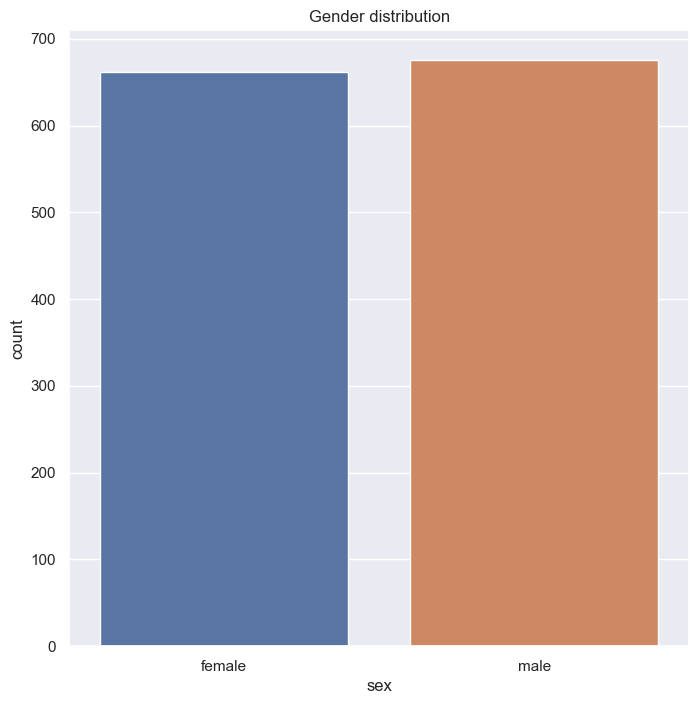

In [18]:
plt.figure(figsize=(8,8))
sns.countplot(x='sex',data=data)
plt.title('Gender distribution')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_26196\2964835286.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['bmi'])


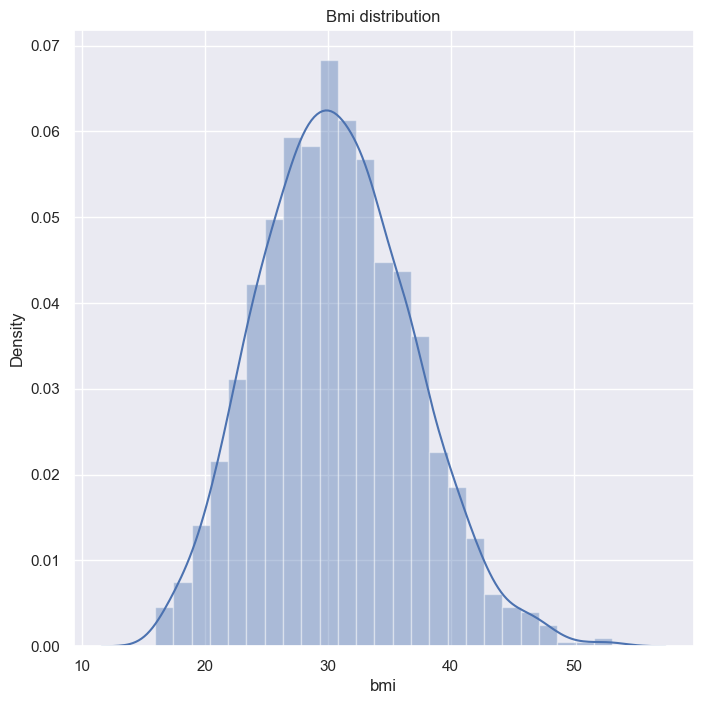

In [19]:
plt.figure(figsize=(8,8))
sns.distplot(data['bmi'])
plt.title('Bmi distribution')
plt.show()

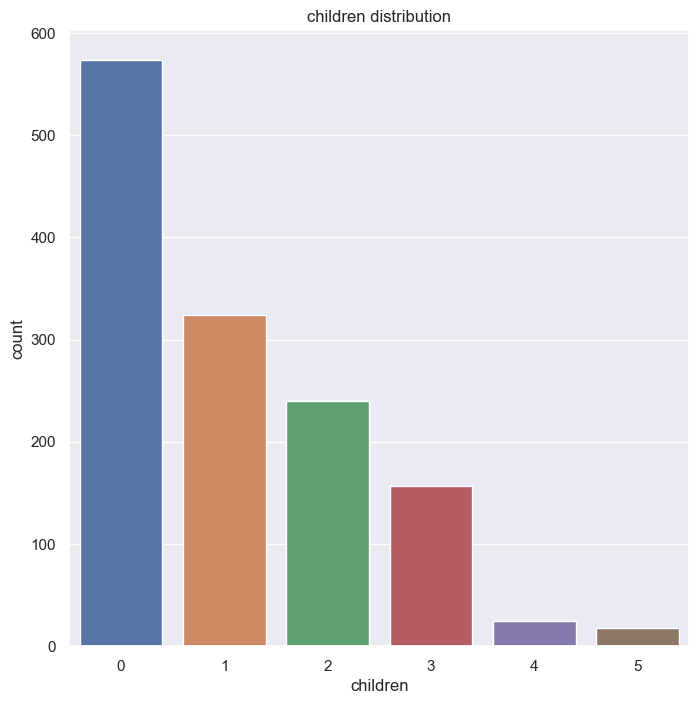

In [20]:
plt.figure(figsize=(8,8))
sns.countplot(x='children',data=data)
plt.title('children distribution')
plt.show()

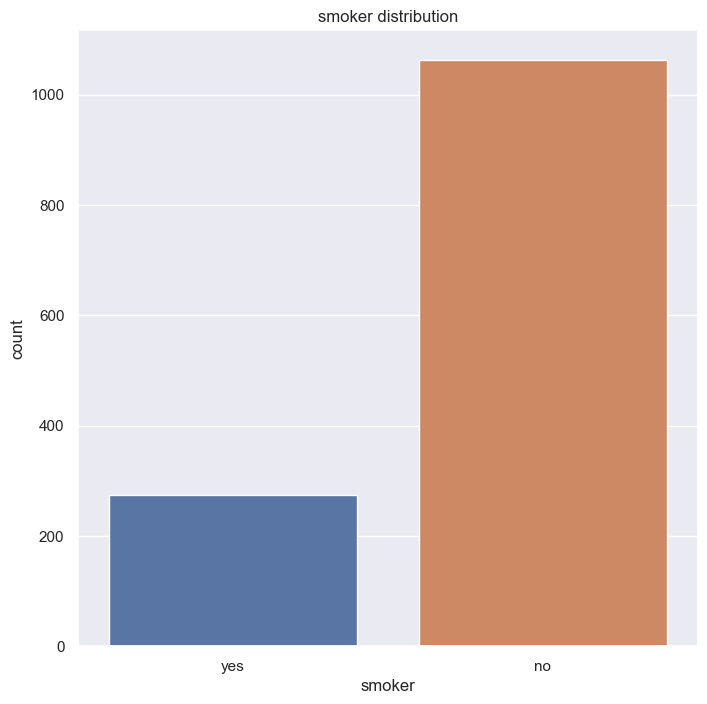

In [21]:
plt.figure(figsize=(8,8))
sns.countplot(x='smoker',data=data)
plt.title('smoker distribution')
plt.show()

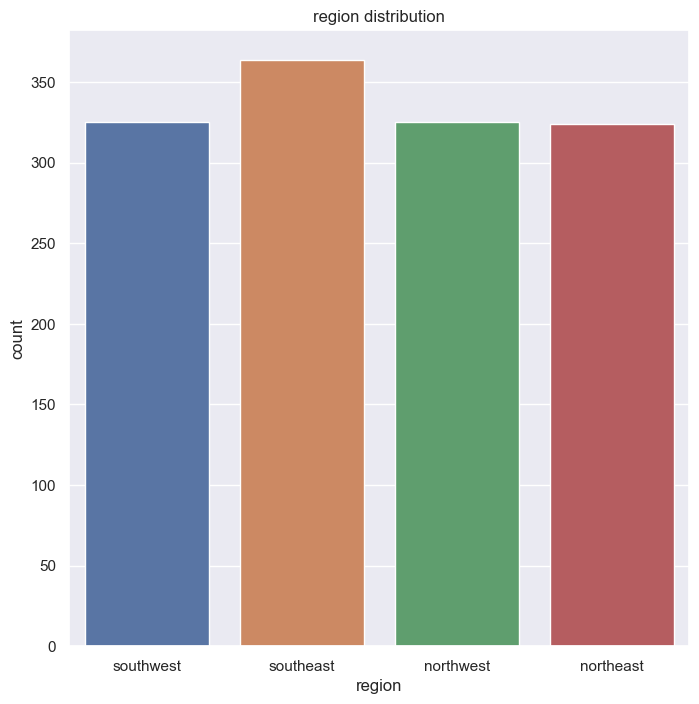

In [22]:
plt.figure(figsize=(8,8))
sns.countplot(x='region',data=data)
plt.title('region distribution')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_26196\4236832211.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['charges'])


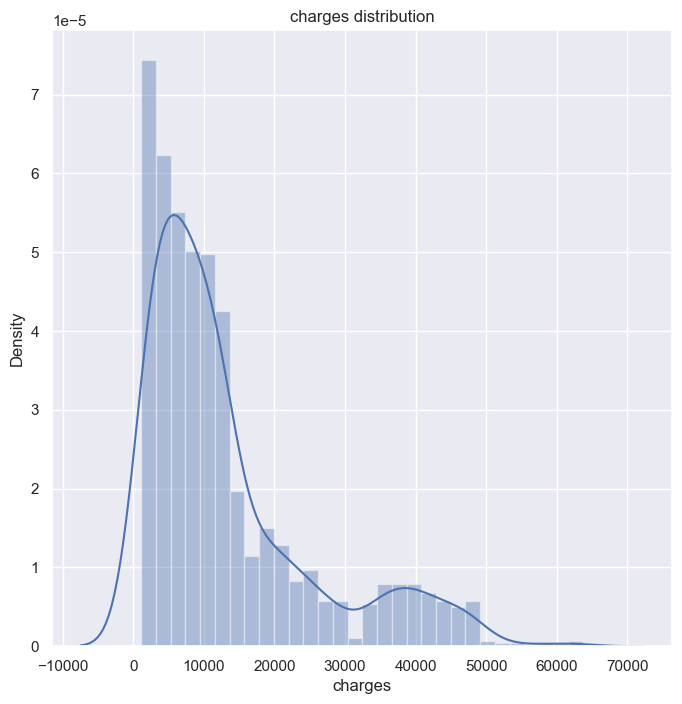

In [23]:
plt.figure(figsize=(8,8))
sns.distplot(data['charges'])
plt.title('charges distribution')
plt.show()

In [24]:
data.replace({'sex':{'male':0,'female':1}},inplace=True)

In [25]:
data.replace({'smoker':{'yes':0,'no':1}},inplace=True)

In [26]:
data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [27]:
x=data.drop(columns='charges',axis=1)
y=data['charges']

In [28]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [29]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [31]:
print(x.shape,x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

#modelling
model=LinearRegression()
model.fit(x_train,y_train)

#prediction
y_pred=model.predict(x_test)

# calculate R2
r2=r2_score(y_test,y_pred)

# calculate adjusted R2
n=len(y_test)
p=x_train.shape[1] #no.of predictors
adjusted_r2=1-(1-r2)*(n-1)/(n-p-1)

# calculate other metrics like MAE ,MSE,and RMSE
mae=np.mean(np.abs(y_pred - y_test))
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

# print results
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adjusted_r2}')
print(f'Mean Absolute Error(MAE): {mae}')
print(f'Mean Squared Error(MSE): {mse}')
print(f'Root Mean Squared Error(RMSE): {rmse}')

R-squared: 0.7447273869684077
Adjusted R-squared: 0.738859051036647
Mean Absolute Error(MAE): 4267.213826730734
Mean Squared Error(MSE): 38337035.48643883
Root Mean Squared Error(RMSE): 6191.690842285234


In [33]:
import joblib
joblib.dump(model,'linear_regression_model2.joblib')

['linear_regression_model2.joblib']

In [34]:
loaded_model=joblib.load('linear_regression_model2.joblib')

age=31
sex=1
bmi=25.74
children=0
smoker=1
region=0
input_data=[age,sex,bmi,children,smoker,region]
output_data=loaded_model.predict([input_data])     #2D
print(f'The insurance cost is.{round(output_data[0])}/-')

The insurance cost is.3760/-


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
